In [219]:
from datetime import datetime
import matplotlib.pyplot as plt
import meteostat
from meteostat import Stations, Daily

In [220]:
seattle = meteostat.Point(47.6, -122.3)

In [221]:
# Import Meteostat library
from meteostat import Stations

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(47.6, -122.3)
station = stations.fetch(3)
# Print DataFrame
station = station.iloc[[0]]
print(station)


                       name country region   wmo  icao  latitude  longitude   
id                                                                            
KBFI0  Seattle / South Park      US     WA  <NA>  KBFI     47.53   -122.302  \

       elevation             timezone hourly_start hourly_end daily_start   
id                                                                          
KBFI0        6.0  America/Los_Angeles   1943-10-01 2023-05-09  1943-10-02  \

       daily_end monthly_start monthly_end     distance  
id                                                       
KBFI0 2022-04-24    1944-01-01  2022-01-01  7785.091192  


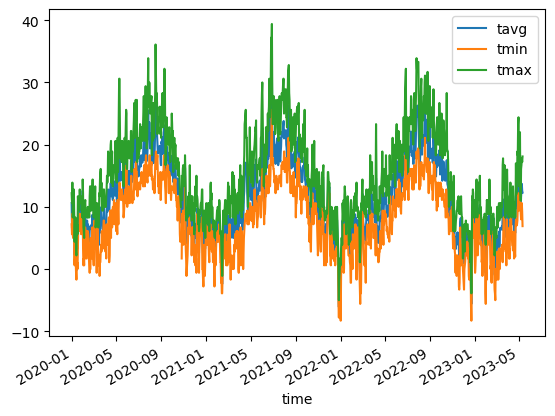

In [222]:
start = datetime(2020, 1, 1)
end = datetime(2023, 5, 10)

data = Daily(loc=station, start=start, end=end)
df = data.fetch()
df.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [223]:
non_zero_sunlight = df['tsun'].notna().all()
non_zero_sunlight

False

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2020-01-01 to 2023-05-10
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    1216 non-null   float64
 1   tmin    1216 non-null   float64
 2   tmax    1216 non-null   float64
 3   prcp    1029 non-null   float64
 4   snow    0 non-null      float64
 5   wdir    1033 non-null   float64
 6   wspd    1217 non-null   float64
 7   wpgt    0 non-null      float64
 8   pres    1093 non-null   float64
 9   tsun    0 non-null      float64
dtypes: float64(10)
memory usage: 104.7 KB


In [228]:
# Find a station that has sunlight
stations = Stations().region('US', 'WA')
all_stations = Stations().region('US').fetch()
washington_stations = stations.fetch()
washington_stations.index

Index(['41FV1', '5Q4PV', '69023', '72781', '72782', '72784', '72785', '72787',
       '72788', '72789', '72790', '72792', '72793', '72797', '72798', '74201',
       '74206', '74207', 'A13Z0', 'KAWO0', 'KBFI0', 'KBLI0', 'KBVS0', 'KCLM0',
       'KCLS0', 'KDEW0', 'KELN0', 'KFCT0', 'KHQM0', 'KMWH0', 'KNRA0', 'KOKH0',
       'KOMK0', 'KORS0', 'KPAE0', 'KPLU0', 'KPSC0', 'KPUW0', 'KPWT0', 'KRLD0',
       'KRNT0', 'KS520', 'KSFF0', 'KSHN0', 'KSKA0', 'KTDO0', 'KTIW0', 'KVUO0',
       'NZJ2T', 'WFP04', 'WICGR'],
      dtype='string', name='id')

In [231]:
# I want to go through the stations and return a list of all stations that have non-zero sunlight data
start = datetime(2020, 1, 1)
end = datetime(2023, 5, 10)

has_sunlight = []
for index in all_stations.index:
    df = Daily(index, start, end).fetch()
    is_empty = df['tsun'].dropna().empty
    is_na = df['tsun'].isna().any()
    is_zeroes = (df['tsun'] == 0.0).all()
    if not is_empty and not is_na and not is_zeroes:
        has_sunlight.append(index)
        break
    
has_sunlight
    

[]

In [ ]:
test = Daily('72785', start, end).fetch()
test['tsun'].notna().all()
test['tsun'].dropna().empty
test['tsun'].dropna()

In [ ]:
# We need to make sure that we have sunlight
df = Daily('KBFI0', start, end).fetch()



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))
df['prcp'].plot(ax=ax[0][0], legend=True)
df['wspd'].plot(ax=ax[0][1], legend=True)
df['pres'].plot(ax=ax[1][0], legend=True)
df['tsun'].plot(ax=ax[1][1], legend=True)
df.head()